# ML Steps in practice ( Running a ML projects )



1.   Problem Definition
2.   Data Collection
3.   Exploratory Data Analysis (EDA)
4.   Data Preprocessing
5.   Feature Engineering
6.   Model Selection (from scikit-learn libraries)
7.   Training Phase
8.   Validation
9.   Evaluation
10.  Hyperparameter Tuning
11.  Model Deployment or Production (industry)
12.  Monitoring (CI/CD)
13.  Model Updating
14.  Documentation (Tools or Development)
15.  Presentation or Reporting




















# getting data from kaggle api

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c rossmann-store-sales

 57% 4.00M/6.99M [00:00<00:00, 5.91MB/s]
100% 6.99M/6.99M [00:01<00:00, 6.86MB/s]


In [ ]:
!unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace store.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd

data = pd.read_csv('train.csv', low_memory=False)

# Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
data.shape

(1017209, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

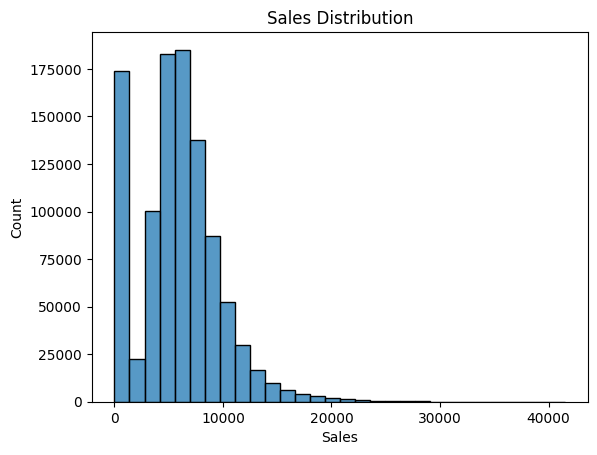

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Sales'], bins=30)
plt.title('Sales Distribution')
plt.show

# Basic Data Preprocessing

In [ ]:
data["Date"] =  pd.to_datetime(data['Date'])

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
# data['weekOfYear'] = data['Date'].dt.weekofyear

In [ ]:
# Fill missing values if any
data.fillna(0, inplace=True)

# Feature Selection and Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

features = ['Store',	'DayOfWeek', 'Promo', 'Year', 'Month', 'Day', 'SchoolHoliday']

X = data[features]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create a Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

model.fit(X_train[:200_000], y_train[:200_000])

RandomForestRegressor(n_jobs=-1, random_state=42)

# predict and evaluate the model

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Calculate and dispaly RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error: {rmse}")

r_sq = r2_score(y_test, y_pred)
print(f"r_squre: {r_sq}")

Root Mean Squared Error: 2218.9676478599436
r_squre: 0.6670575910972225


# Feature importance

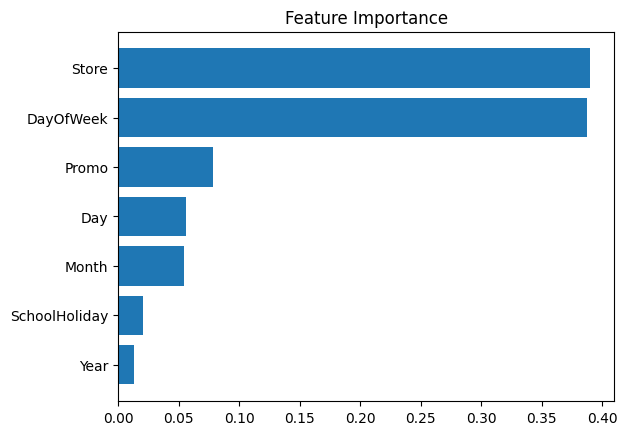

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.title('Feature Importance')
plt.show()